# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview 
print (merged_df)




     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female

In [46]:
# Checking the number of mice.
num_mice = merged_df["Mouse ID"].nunique()
print (f"Number of mice = {num_mice}")


Number of mice = 249


In [47]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_df[merged_df.duplicated(subset = ["Mouse ID", "Timepoint"],keep = False)]


In [48]:
# Optional: Get all the data for the duplicate mouse ID.
print (f"Duplicate entries:\n{duplicate_mice}")

Duplicate entries:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21         

In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
unique_mice_cleaned = clean_df["Mouse ID"].nunique()
print (clean_df)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female

In [50]:
# Checking the number of mice in the clean DataFrame.
print (f"Number of unique mice after cleaning: {unique_mice_cleaned}")


Number of unique mice after cleaning: 249


## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = clean_df.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": grouped_data["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume": grouped_data["Tumor Volume (mm3)"].median(),
    "Tumor Volume Variance": grouped_data["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std. Dev.": grouped_data["Tumor Volume (mm3)"].std(),
    "Tumor Volume SEM": grouped_data["Tumor Volume (mm3)"].sem()
})
print(summary_stats)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [52]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Generate the summary statistics using the agg() method
summary_stats_advanced = grouped_data["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume="mean",
    Median_Tumor_Volume="median",
    Tumor_Volume_Variance="var",
    Tumor_Volume_Std_Dev="std",
    Tumor_Volume_SEM="sem"
)
# Using the aggregation method, produce the same summary statistics in a single line
print(summary_stats_advanced)

              Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor_Volume_Std_Dev  Tumor_Volume_SE

## Bar and Pie Charts

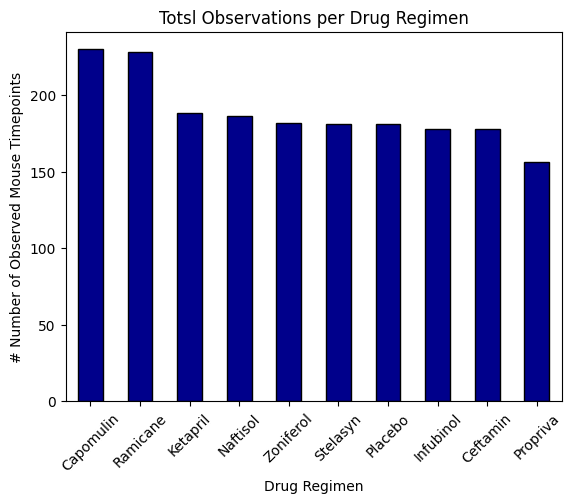

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df["Drug Regimen"].value_counts()

regimen_counts.plot(kind="bar", color="darkblue", edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("# Number of Observed Mouse Timepoints")
plt.title("Totsl Observations per Drug Regimen")
plt.xticks(rotation=45)
plt.show()


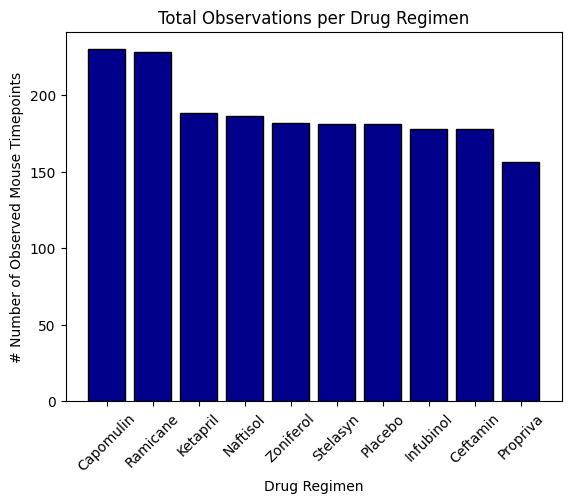

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_counts.index, regimen_counts.values, color="darkblue", edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("# Number of Observed Mouse Timepoints")
plt.title("Total Observations per Drug Regimen")
plt.xticks(rotation=45)
plt.show()

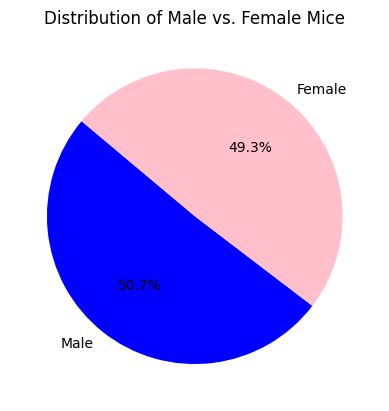

In [55]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender = clean_df["Sex"].value_counts()

gender.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["blue", "pink"])
plt.title("Distribution of Male vs. Female Mice")
plt.ylabel("")  # Hide y-axis label
plt.show()

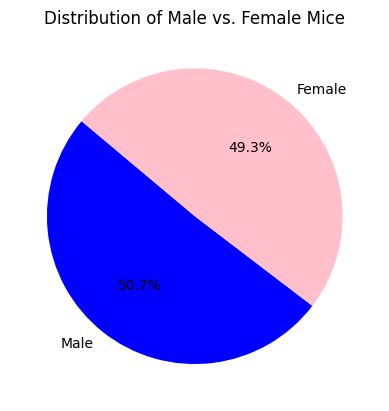

In [56]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.pie(gender, labels=gender.index, autopct="%1.1f%%", startangle=140, colors=["blue", "pink"])
plt.title("Distribution of Male vs. Female Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df =final_timepoints.merge(clean_df, on = ["Mouse ID", "Timepoint"], how = "left")

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volumes = merged_df[merged_df["Drug Regimen"].isin(treatments)]

# Create a dictionary to store the tumor volumes for each treatment
tumor_volume_data = {}

# Loop through each drug to calculate quartiles and outliers
for drug in treatments:
    drug_data = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume_data[drug] = drug_data  # Store tumor volumes for box plot later

    # Calculate quartiles and IQR
    Q1 = drug_data.quantile(0.25)
    Q3 = drug_data.quantile(0.75)
    IQR = Q3 - Q1

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Determine outliers using upper and lower bounds
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    print(f"{drug} Outliers: {outliers.values}")

Capomulin Outliers: []
Ramicane Outliers: []
Infubinol Outliers: [36.3213458]
Ceftamin Outliers: []


/var/folders/69/w7_9wntx125gjmdpq68f_6j80000gn/T/ipykernel_68867/3472202936.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volume_lists, labels=tumor_volume_data.keys(), patch_artist=True,


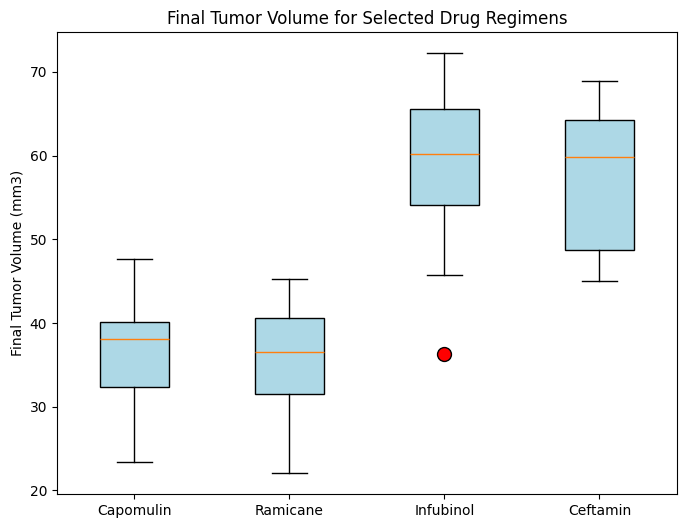

In [70]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a dictionary where keys are treatments and values are lists of final tumor volumes
tumor_volume_data = {treatments: final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == treatments, "Tumor Volume (mm3)"]
for treatments in treatment_list}

tumor_volume_lists = [v.tolist() for v in tumor_volume_data.values()]
plt.figure(figsize = (8, 6))
plt.boxplot(tumor_volume_lists, labels=tumor_volume_data.keys(), patch_artist=True,
            boxprops=dict(facecolor="lightblue"), flierprops=dict(marker='o', markerfacecolor='red', markersize=10))

plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume for Selected Drug Regimens")
plt.show()

## Line and Scatter Plots

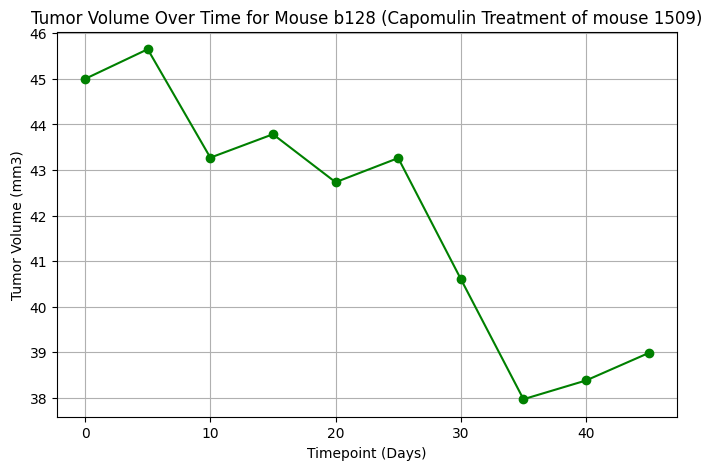

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].iloc[0]["Mouse ID"]
mouse_data = clean_df.loc[clean_df["Mouse ID"] == capomulin_mouse]

# Generate the line plot
plt.figure(figsize=(8, 5))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o", linestyle="-", color="green")

# Formatting the plot
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume Over Time for Mouse {capomulin_mouse} (Capomulin Treatment of mouse 1509)")
plt.grid()
plt.show()


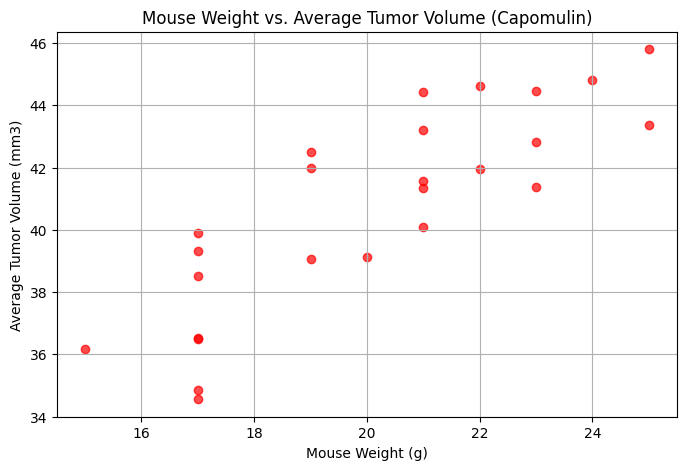

In [74]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume per mouse
capomulin_avg_tumor = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

# Generate scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(capomulin_avg_tumor["Weight (g)"], capomulin_avg_tumor["Tumor Volume (mm3)"], color="red", alpha=0.7)

# Formatting the plot
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.grid()
plt.show()


## Correlation and Regression

Correlation between Mouse Weight and Average Tumor Volume: 0.84


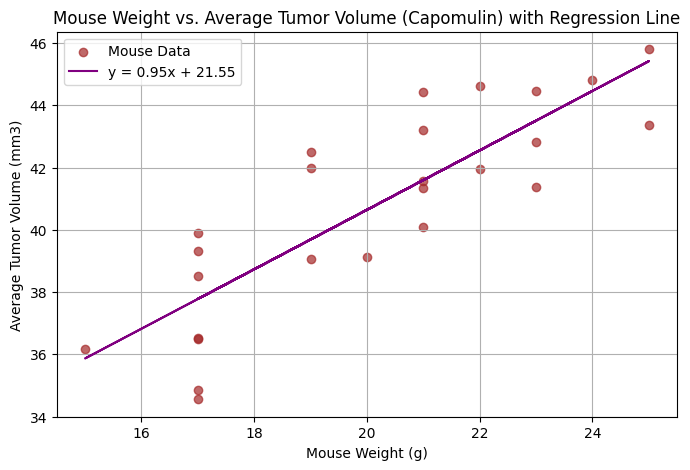

In [80]:
# Calculate the correlation coefficient and a linear regression model
from scipy.stats import pearsonr

# Calculate correlation coefficient
correlation, _ = pearsonr(capomulin_avg_tumor["Weight (g)"], capomulin_avg_tumor["Tumor Volume (mm3)"])
print(f"Correlation between Mouse Weight and Average Tumor Volume: {correlation:.2f}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Get regression values
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_tumor["Weight (g)"], capomulin_avg_tumor["Tumor Volume (mm3)"])

# Generate regression line
regression_line = slope * capomulin_avg_tumor["Weight (g)"] + intercept

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(capomulin_avg_tumor["Weight (g)"], capomulin_avg_tumor["Tumor Volume (mm3)"], color="brown", alpha=0.7, label="Mouse Data")

# Plot regression line
plt.plot(capomulin_avg_tumor["Weight (g)"], regression_line, color="purple", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Formatting the plot
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin) with Regression Line")
plt.legend()
plt.grid()
plt.show()
